<a href="https://colab.research.google.com/github/Harkeerat-Pathak/Week2-Assignment/blob/main/Week2_Harkeerat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2: Clean your data**

In this week's assignment we will perform the complete data preprocessing on a dataset from a clinical research laboratory.

## Description

Obesity is a risk factor for breast cancer in premenopausal women. Existing literature has found that obesity is a risk factor because it can increase estrogen levels in women. Specifically, a biomarker of estrogen level, serum estradiol, is an identified risk factor for breast cancer. To evaluate this type of relationship, researchers studied a group of 211 women of premenonausal age in the USA, 151 of whom were black (African American) and 60 white (Caucasian). Adiposity was quantified with two different measures: BMI and WHR. Estradiol level was also measured from hormone analysis. Other risk factors such as number of children and age of the woman are also included. The dataset includes the following descriptors:

* **Id:** identifier.
* **Estrad (serum estradiol):** measure of estradiol (hormone analysis)
* **Ethnic (ethnicity):** African American or Caucasian.
* **Entage:** age of the person.
* **NumChild:** number of children.
* **Agefbo:** age at which the person has had the first child.
* **Anykids:** 1 if he/she has had children, 0 if he/she has not.
* **Agemenar:** age of menarche (first menstruation).
* **BMI:** measure of general adiposity.
* **WHR:** measure of abdominal adiposity.
* **Area:** rural (1) or urban (0).

## File upload

We start by loading the dataset we will be working with. Remember that in order to start working with Google Colab you must **Connect to a runtime environment**.

Then you must go to the **Files** folder (in the left panel), where you must upload the csv attached to this assignment.

In [ ]:
import pandas as pd

from google.colab import files
upload_file=files.upload()



Saving estradiol.csv to estradiol.csv


In [ ]:
dataset = pd.read_csv('estradiol.csv', sep=';')

**Exercise:** Make a brief preliminar inspection of the dataset, indicating the number of records, the number of descriptors, and the name of the descriptors. If you identify a descriptor that should not appear in the dataset, remove it.

In [ ]:
# Description of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 1 to 211
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        211 non-null    int64 
 1   Estradl   211 non-null    object
 2   Ethnic    211 non-null    object
 3   Entage    211 non-null    object
 4   Numchild  211 non-null    int64 
 5   Agefbo    211 non-null    int64 
 6   Anykids   211 non-null    int64 
 7   Agemenar  211 non-null    object
 8   BMI       211 non-null    object
 9   WHR       211 non-null    object
 10  Area      211 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 19.8+ KB


In [ ]:
# dataset.info
print('Dataset has {} records and {} descriptors'.format(*dataset.shape))
print(dataset.columns)
dataset

Dataset has 211 records and 11 descriptors
Index(['Id', 'Estradl', 'Ethnic', 'Entage', 'Numchild', 'Agefbo', 'Anykids',
       'Agemenar', 'BMI', 'WHR', 'Area'],
      dtype='object')


,Id,Estradl,Ethnic,Entage,Numchild,Agefbo,Anykids,Agemenar,BMI,WHR,Area
1,2,94,Caucasian,30,0,0,0,"11,0","18,9038","0,7",0
2,2,7.7,Caucasian,23,0,0,0,15.0,"20,4386","0,7",0
3,3,20.23,Caucsian,21,0,0,0,13.0,"22,2578","0,75",1
4,6,41.37,Caucasian,33,0,0,0,14.0,"20,5265","0,73",1
5,8,"42,57",Caucsian,31,0,0,0,13.0,"24,3356","0,75",1
...,...,...,...,...,...,...,...,...,...,...,...
207,3530,31.6,African American,34,2,19,1,"10,0","36,668","0,86",1
208,4110,76.3,African American,22,1,19,1,14.0,"33,835","0,83",1
209,4170,25,African American,30,0,0,0,"15,0","28,7316","0,92",1
210,4180,19.3,Af Am,27,1,25,1,15.0,"37,2757","0,91",1


In [ ]:
# To count missing values
dataset.isnull().sum()
# Luckily we don't have any missing values

Id          0
Estradl     0
Ethnic      0
Entage      0
Numchild    0
Agefbo      0
Anykids     0
Agemenar    0
BMI         0
WHR         0
Area        0
dtype: int64

**Exercise:** Show a random selection of some records from the dataset. This will help you to perform a preliminary visual inspection to confirm that the data has been loaded correctly. If you identify any formatting problems that need to be corrected, please do so.

In [ ]:
dataset.sample(10)

,Id,Estradl,Ethnic,Entage,Numchild,Agefbo,Anykids,Agemenar,BMI,WHR,Area
16,31,32.1,Caucasian,19,0,0,0,15.0,"20,2279","0,66",1
194,220,47.1,African American,29,2,22,1,11.0,"29,5573","0,83",0
74,3230,26.6,African American,34,2,29,1,14.0,"20,6484","0,75",0
164,4390,52.3,African American,27,0,0,0,11.5,"27,8085","0,69",0
11,16,38.6,Caucasian,24,0,0,0,11.0,"19,3962","0,75",0
29,57,50,Caucasian,30,0,0,0,13.0,"21,0797","0,73",0
92,5002,"34,2",African American,28,0,0,0,12.0,"22,0469","0,7",1
174,5007,33.3,African American,27,0,0,0,12.0,"30,9726","0,87",1
187,5036,40.9,African American,31,0,0,0,13.0,"33,6304","0,88",1
150,210,39.93,African American,24,9,99,9,99,"33,3769","0,68",1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 1 to 211
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        211 non-null    int64 
 1   Estradl   211 non-null    object
 2   Ethnic    211 non-null    object
 3   Entage    211 non-null    object
 4   Numchild  211 non-null    int64 
 5   Agefbo    211 non-null    int64 
 6   Anykids   211 non-null    int64 
 7   Agemenar  211 non-null    object
 8   BMI       211 non-null    object
 9   WHR       211 non-null    object
 10  Area      211 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 19.8+ KB


In [23]:
dataset.describe()

,Id,Numchild,Agefbo,Anykids,Area
count,211.000000,211.000000,211.000000,211.000000,211.000000
mean,2463.995261,0.720379,9.099526,0.516588,0.682464
std,2050.071930,1.648235,18.485633,1.435423,0.466625
min,2.000000,0.000000,0.000000,0.000000,0.000000
25%,60.500000,0.000000,0.000000,0.000000,0.000000
50%,3260.000000,0.000000,0.000000,0.000000,1.000000
75%,4265.000000,1.000000,18.000000,1.000000,1.000000
max,5039.000000,9.000000,99.000000,9.000000,1.000000


In [43]:
# I can find more than one columns like 'Estradl', 'Entage'.'Agemenar','BMI','WHR' With datatype object and they need to convert in to Int datatype



# Save the dataframe to a new CSV file
dataset.to_csv('estradiol_clean.csv', index=False)

estradiol_clean = pd.read_csv('estradiol_clean.csv')

estradiol_clean.head()


,Id,Estradl,Ethnic,Entage,Numchild,Agefbo,Anykids,Agemenar,BMI,WHR,Area
0,2,94,Caucasian,30,0,0,0,"11,0","18,9038","0,7",0
1,2,7.7,Caucasian,23,0,0,0,15.0,"20,4386","0,7",0
2,3,20.23,Caucsian,21,0,0,0,13.0,"22,2578","0,75",1
3,6,41.37,Caucasian,33,0,0,0,14.0,"20,5265","0,73",1
4,8,"42,57",Caucsian,31,0,0,0,13.0,"24,3356","0,75",1


In [44]:
print(estradiol_clean.columns)

Index(['Id', 'Estradl', 'Ethnic', 'Entage', 'Numchild', 'Agefbo', 'Anykids',
       'Agemenar', 'BMI', 'WHR', 'Area'],
      dtype='object')


In [45]:
columns_to_convert = ['Estradl', 'Entage', 'Agemenar', 'BMI', 'WHR']

# Remove commas and convert the columns to numeric type(float)
for column in columns_to_convert:
    estradiol_clean[column] = estradiol_clean[column].str.replace(',', '').astype(float)

# Verify the data types after conversion
print(estradiol_clean.dtypes)


Id            int64
Estradl     float64
Ethnic       object
Entage      float64
Numchild      int64
Agefbo        int64
Anykids       int64
Agemenar    float64
BMI         float64
WHR         float64
Area          int64
dtype: object


**Exercise:** Determine the mean, median and standard deviation for the descriptors of a quantitative nature.

In [46]:
estradiol_clean.describe()

,Id,Estradl,Entage,Numchild,Agefbo,Anykids,Agemenar,BMI,WHR,Area
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,2463.995261,189.824218,26.436019,0.720379,9.099526,0.516588,30.789100,238658.815166,69.644550,0.682464
std,2050.071930,834.601483,9.146919,1.648235,18.485633,1.435423,41.226342,82255.232455,21.231192,0.466625
min,2.000000,2.200000,11.000000,0.000000,0.000000,0.000000,9.000000,1925.000000,7.000000,0.000000
25%,60.500000,23.950000,21.000000,0.000000,0.000000,0.000000,12.000000,206581.000000,71.000000,0.000000
50%,3260.000000,39.000000,26.000000,0.000000,0.000000,0.000000,13.000000,236874.000000,74.000000,1.000000
75%,4265.000000,57.030000,31.000000,1.000000,18.000000,1.000000,14.000000,290305.000000,79.000000,1.000000
max,5039.000000,7857.000000,130.000000,9.000000,99.000000,9.000000,150.000000,422424.000000,98.000000,1.000000


In [47]:
# Your answer here

# Calculate the mean
mean_values = estradiol_clean.mean()

# Calculate the median
median_values = estradiol_clean.median()

# Calculate the standard deviation
std_values = estradiol_clean.std()

# Print the results
print("Mean:")
print(mean_values)
print("\nMedian:")
print(median_values)
print("\nStandard Deviation:")
print(std_values)

Mean:
Id            2463.995261
Estradl        189.824218
Entage          26.436019
Numchild         0.720379
Agefbo           9.099526
Anykids          0.516588
Agemenar        30.789100
BMI         238658.815166
WHR             69.644550
Area             0.682464
dtype: float64

Median:
Id            3260.0
Estradl         39.0
Entage          26.0
Numchild         0.0
Agefbo           0.0
Anykids          0.0
Agemenar        13.0
BMI         236874.0
WHR             74.0
Area             1.0
dtype: float64

Standard Deviation:
Id           2050.071930
Estradl       834.601483
Entage          9.146919
Numchild        1.648235
Agefbo         18.485633
Anykids         1.435423
Agemenar       41.226342
BMI         82255.232455
WHR            21.231192
Area            0.466625
dtype: float64


<ipython-input-47-a35fa5d39faa>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = estradiol_clean.mean()
<ipython-input-47-a35fa5d39faa>:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = estradiol_clean.median()
<ipython-input-47-a35fa5d39faa>:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silen

## Outliers

Analyze the presence of possible extreme values (outliers) in the Estradiol variable. If very extreme values are observed, delete the corresponding records from the file. Display a boxplot to visualize the possible presence of outliers. At the end of the deletion (if applicable), display a boxplot with the final values.

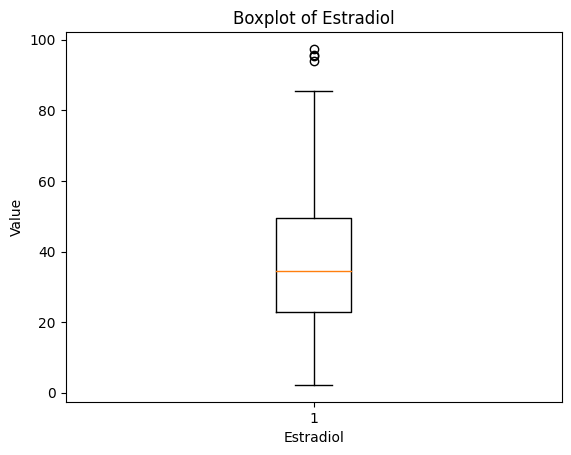

In [69]:
# Your answer here


import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the 'Estradiol' variable

# Create a boxplot
plt.boxplot(estradiol_clean['Estradl'])

# Add labels and title
plt.xlabel('Estradiol')
plt.ylabel('Value')
plt.title('Boxplot of Estradiol')

# Show the plot
plt.show()

It's clearly visible that there are outliers shown in the boxplot.

Step 1. Identify outliers using a suitable method, such as the Tukey's fences method. For instance, you can calculate the lower and upper fences as follows:

In [68]:
Q1 = estradiol_clean['Estradl'].quantile(0.25)
Q3 = estradiol_clean['Estradl'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

Step 2. Identify the records with 'Estradiol' values outside the lower and upper fences:

In [70]:
outliers = estradiol_clean[(estradiol_clean['Estradl'] < lower_fence) | (estradiol_clean['Estradl'] > upper_fence)]


In [71]:
print(outliers.index)

Int64Index([0, 32, 89, 139], dtype='int64')


Step 3. If there are extreme values (outliers) present, you can choose to remove the corresponding records from the DataFrame:

In [72]:
estradiol_clean = estradiol_clean.drop(outliers.index)


Step 4. Plot boxplot again after removing the errors

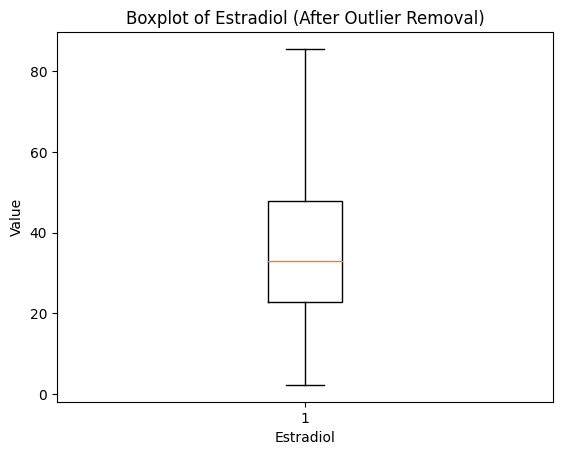

In [73]:
plt.boxplot(estradiol_clean['Estradl'])
plt.xlabel('Estradiol')
plt.ylabel('Value')
plt.title('Boxplot of Estradiol (After Outlier Removal)')
plt.show()


## Quantitative values

Check using boxplots or histograms the values of the rest of the quantitative variables and identify if there are any cases with anomalous values. You only have to identify them, we will correct them later.

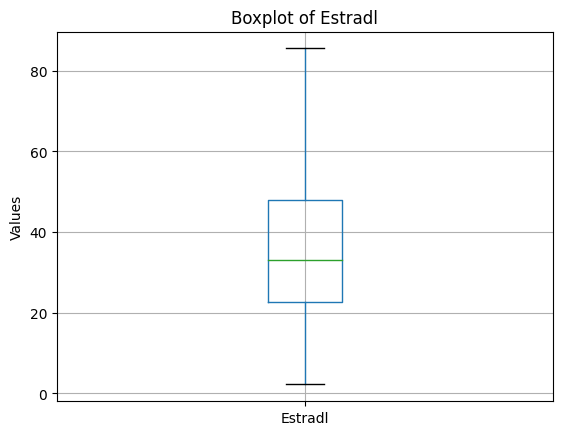

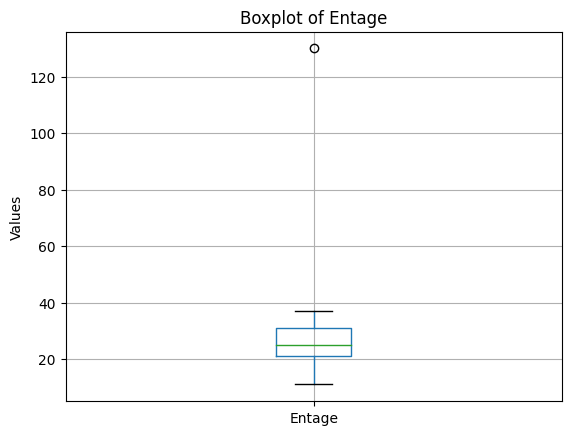

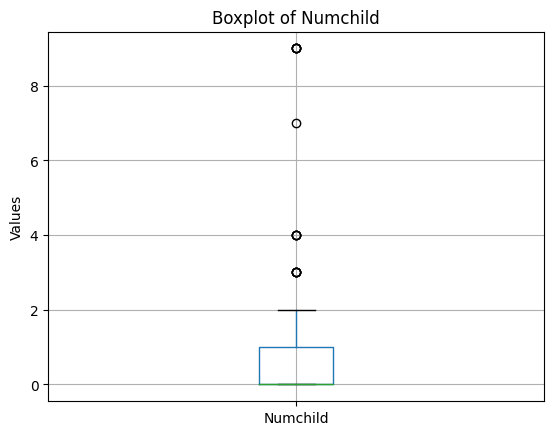

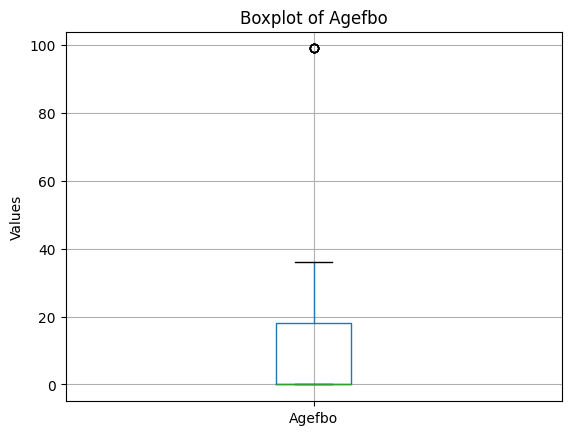

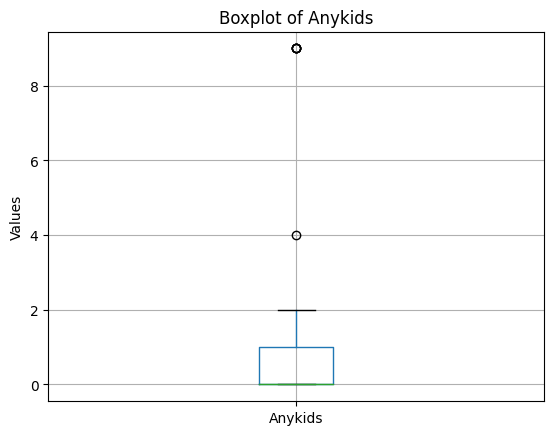

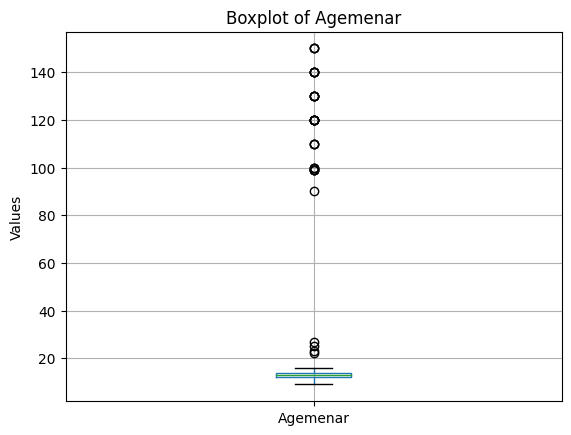

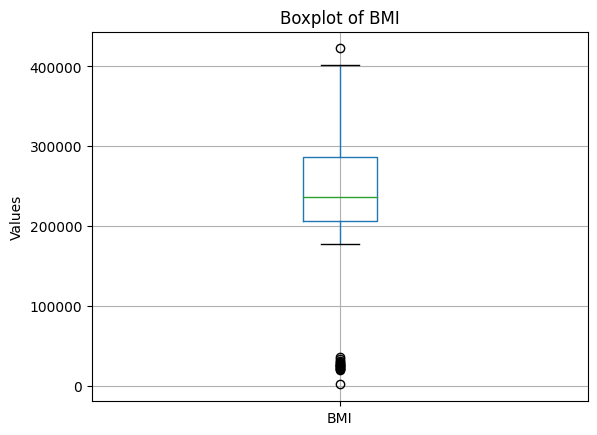

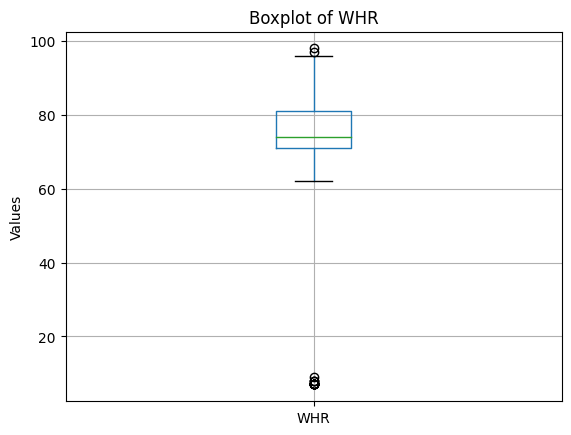

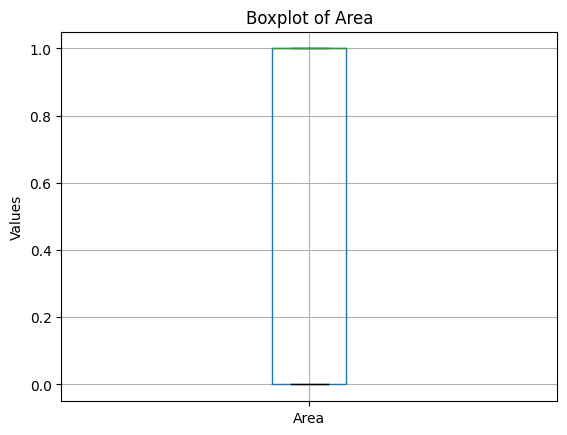

In [84]:
estradiol_clean = estradiol_clean.drop('Id', axis=1)

# Filter only columns with numeric data type
numeric_columns = estradiol_clean.select_dtypes(include=[float, int]).columns

# Iterate over the numeric columns and create box plots
for column in numeric_columns:
    plt.figure()  # Create a new figure for each box plot
    estradiol_clean.boxplot(column=[column])
    plt.title('Boxplot of ' + column)
    plt.ylabel('Values')

# Show the plots
plt.show()

Except estradl all feature's boxplots shows outliers which need to be remove

## Inconsistencies

Identify and correct all possible inconsistencies mentioned below:

* Inconsistencies between Anykids and Numchild. The Numchild value prevails. And therefore, Anykids must be adjusted accordingly.

* Inconsistencies between Entage and Agemenarq. If Agemenarq is higher than EntAge, it is probably due to a data entry error and therefore the values must be exchanged.

* Agefbo should be greater than Agemenarq if the woman has had any children. It takes the value 0 otherwise.

In [ ]:
# Your answer here

## Qualitative values

Modify the values of the qualitative variables so that they satisfy the following conditions. Do not forget to identify possible errors.

* The values of the Ethnic variable are standardized to "African American" and "Caucasian".

* The values of the variable Anykids should be "Yes" (value 1), and "No" (value 0).

* The values of the variable Area are "Rural" (value 1) or "Urban" (value 0).

In [ ]:
# Your answer here

## Imputation

In the case of detecting any outliers in the quantitative variables age, age at menarche or number of children (not previously resolved) perform a value imputation on these variables.

In case of performing value imputations, the imputation should be done using only the information of the quantitative variables and the data of the same ethnicity.

In [ ]:
# Your answer here

## Save file

Save the preprocessed dataset in a new file named **estradiol_clean.csv**.

In [ ]:
# Your answer here